In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
from tqdm import trange, tqdm
from scipy.constants import h, hbar, c, alpha, m_e, e, epsilon_0, atomic_mass, pi, physical_constants
a_0 = physical_constants['Bohr radius'][0]

$P_{diabatic} = exp\left( -\frac{2 \pi |V_{ij}|^2}{\hbar (dE/dF)(dF/dt)} \right)$
where,
$V_{ij} = \frac{E_{min}}{2}$

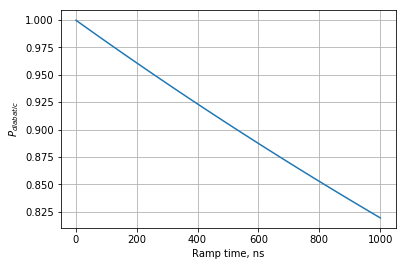

In [266]:
E_min = (17.903 * 10**6) * h # E=hf(Hz)
V_ij = E_min / 2 # E
plate_sep = 1.28 # cm
voltage_offset = 0.028 # V

dipole_moment_73s = (-8.132  * 10**9) # Hz / (V/cm)
dipole_moment_72c = (+10.659 * 10**9) # Hz / (V/cm)

dE_dF = (dipole_moment_72c - dipole_moment_73s) * h # ( Hz/(V/cm) ) * h = E/(V/cm)

dF = (1.109-voltage_offset)/plate_sep # V/cm
dT = np.linspace(1, 1000, 100) * 10**-9 # s
dF_dT = dF / dT # (V/cm)/s

# dE_dF*dF_dT = E/(V/cm)  *  (V/cm)/ns  = E/s
# V_ij^2 / (h*dE_dF*dF_dT) = E^2 / (h*E/s) = E*s/h = Hz*s = 1

p_diabatic = np.exp( -(2*np.pi*np.abs(V_ij)**2) / (hbar*dE_dF*dF_dT) )
p_adiabatic = 1 - p_diabatic

plt.plot(dT * 10**9, p_diabatic)
plt.xlabel('Ramp time, ns')
plt.ylabel('$P_{diabatic}$')
plt.grid()

plt.savefig('diabatic prob.pdf')

## Ramp up

Low level: 1.9712825054e-18
High level: 1.109
Avoided crossing level: 1.084


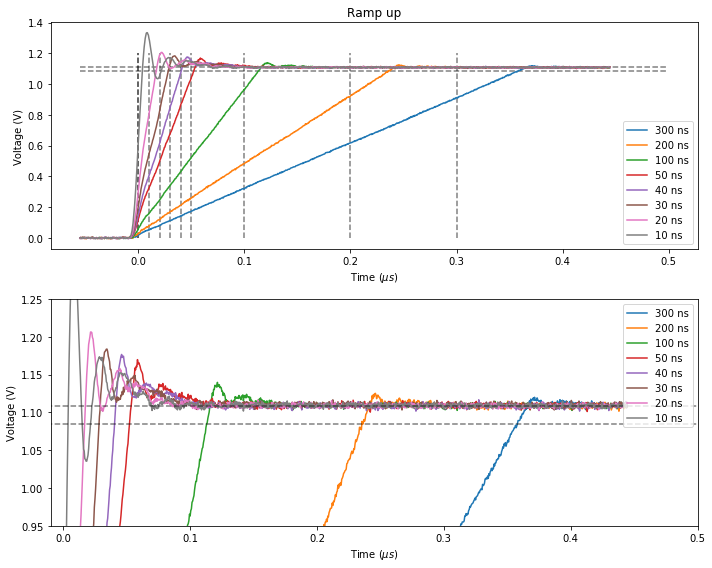

In [256]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
data_dir = 'data/voltage_ramp/'
data_pre = 'TR050717_'
data_files = ['009','010','011','012','013','014','015','016']
data_labels = ['300','200','100','50','40','30','20','10']
x_data = []
y_data = []
for i, data_file in enumerate(data_files):
    d1, d2 = np.transpose( np.loadtxt(data_dir+data_pre+data_file+'.dat', delimiter='\t') )
    x_data.append(d1-np.min(d1))
    y_data.append(d2-np.mean(d2[:50]))

plt.plot((0.0, 0.0), (0.0, 1.2), '--k', alpha=0.8)
plt.plot((0.01, 0.01), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.02, 0.02), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.03, 0.03), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.04, 0.04), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.05, 0.05), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.1, 0.1), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.2, 0.2), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.3, 0.3), (0.0, 1.2), '--k', alpha=0.5)

voltage_offset = 0.028
plate_sep = 1.28
time_offset = -0.055
voltage_max = 1.109
voltage_i = np.mean(y_data[0][:50])
voltage_f = np.mean(y_data[0][-50:])
scl = voltage_max / voltage_f

field_crossing = 0.825
voltage_crossing = (field_crossing*plate_sep)+voltage_offset
plt.plot((time_offset, np.max(x_data[0]*10**6)), (voltage_f*scl, voltage_f*scl),'--k', alpha=0.5)
plt.plot((time_offset, np.max(x_data[0]*10**6)), (voltage_crossing, voltage_crossing),'--k', alpha=0.5)

for i, data_file in enumerate(data_files):
        plt.plot((x_data[i]*10**6)+time_offset, (y_data[i]*scl), label=data_labels[i]+' ns')
        
plt.legend()
plt.xlabel('Time ($\mu s$)')
plt.ylabel('Voltage (V)')
plt.title('Ramp up')

plt.subplot(2,1,2)
for i, data_file in enumerate(data_files):
        plt.plot((x_data[i]*10**6)+time_offset, (y_data[i]*scl), label=data_labels[i]+' ns') 
plt.legend(loc='upper right')
plt.xlabel('Time ($\mu s$)')
plt.ylabel('Voltage (V)')
plt.xlim([-0.01, 0.5])
plt.ylim([0.95,1.25])
plt.plot((time_offset, np.max(x_data[0]*10**6)), (voltage_f*scl, voltage_f*scl),'--k', alpha=0.5)
plt.plot((time_offset, np.max(x_data[0]*10**6)), (voltage_crossing, voltage_crossing),'--k', alpha=0.5)

plt.tight_layout()
plt.savefig('ramped_up.pdf')

print('Low level:', voltage_i*scl)
print('High level:', voltage_f*scl)
print('Avoided crossing level:', voltage_crossing)

## Ramp down

Low level: -2.30163236946e-18
High level: 1.109
Avoided crossing level: 1.084


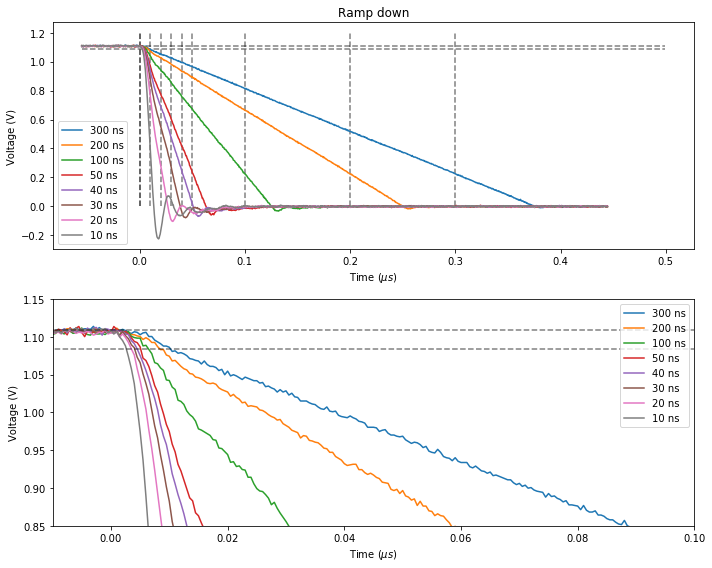

In [257]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
data_dir = 'data/voltage_ramp/'
data_pre = 'TR050717_'
data_files = ['025','026','027','028','029','030','031','032']
data_labels = ['300','200','100','50','40','30','20','10']
x_data = []
y_data = []
for i, data_file in enumerate(data_files):
    d1, d2 = np.transpose( np.loadtxt(data_dir+data_pre+data_file+'.dat', delimiter='\t') )
    x_data.append(d1-np.min(d1))
    y_data.append(d2-np.mean(d2[-50:]))

plt.plot((0.0, 0.0), (0.0, 1.2), '--k', alpha=0.8)
plt.plot((0.01, 0.01), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.02, 0.02), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.03, 0.03), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.04, 0.04), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.05, 0.05), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.1, 0.1), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.2, 0.2), (0.0, 1.2), '--k', alpha=0.5)
plt.plot((0.3, 0.3), (0.0, 1.2), '--k', alpha=0.5)

voltage_offset = 0.028
plate_sep = 1.28
time_offset = -0.055
voltage_max = 1.109
voltage_i = np.mean(y_data[0][:50])
voltage_f = np.mean(y_data[0][-50:])
scl = voltage_max / voltage_i

field_crossing = 0.825
voltage_crossing = (field_crossing*plate_sep)+voltage_offset
plt.plot((time_offset, np.max(x_data[0]*10**6)), (voltage_i*scl, voltage_i*scl),'--k', alpha=0.5)
plt.plot((time_offset, np.max(x_data[0]*10**6)), (voltage_crossing, voltage_crossing),'--k', alpha=0.5)

for i, data_file in enumerate(data_files):
        plt.plot((x_data[i]*10**6)+time_offset, (y_data[i]*scl), label=data_labels[i]+' ns')
    
plt.legend()
plt.xlabel('Time ($\mu s$)')
plt.ylabel('Voltage (V)')
plt.title('Ramp down')

plt.subplot(2,1,2)
for i, data_file in enumerate(data_files):
        plt.plot((x_data[i]*10**6)+time_offset, (y_data[i]*scl), label=data_labels[i]+' ns')
        
plt.legend(loc='upper right')
plt.xlabel('Time ($\mu s$)')
plt.ylabel('Voltage (V)')
plt.xlim([-0.01, 0.1])
plt.ylim([0.85,1.15])

plt.plot((time_offset, np.max(x_data[0]*10**6)), (voltage_i*scl, voltage_i*scl),'--k', alpha=0.5)
plt.plot((time_offset, np.max(x_data[0]*10**6)), (voltage_crossing, voltage_crossing),'--k', alpha=0.5)

plt.tight_layout()
plt.savefig('ramped_down.pdf')

print('Low level:', voltage_f*scl)
print('High level:', voltage_i*scl)
print('Avoided crossing level:', voltage_crossing)